In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

Loading data from previous exercise

In [ ]:
np.random.seed(999)

In [ ]:
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print("Data Shape: ", iris.data.shape)
A = iris.data
#check the shape of iris target
print("Target Shape: ", iris.target.shape)
y = iris.target

# for j in range(A.shape[1]):
#   A[:,j] = A[:,j]/np.linalg.norm(A[:,j])

Data Shape:  (150, 4)
Target Shape:  (150,)


In [ ]:
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
for i in range(iris.target.shape[0]):
  if (y[i] == 0) or (y[i] == 2):
    y[i] =  -1  # Convert class labels that are not 1 into -1

In [ ]:
#Use the first 80% of indexarr to create the train data and the remaining
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices
# print(indexarr) #check indexarr after shuffling
p = int(0.8*len(indexarr))
train_data =  A[indexarr[:p]]
train_label = y[indexarr[:p]]
test_data = A[indexarr[p:]]
test_label = y[indexarr[p:]]

In [ ]:
indexarr

array([ 61,  64,  80,  40,  36,   0,  44,  82, 126,  17,  26, 143,  28,
       134,  60, 104, 149, 111, 142,  18,  29,   7,  20, 145,  83,  45,
       137, 114, 130, 119, 132, 122,  55,  41, 100,  24,  68, 131,  53,
        65,  97, 120,  37,  90, 108,  73,  12,  77,  19,  10, 138,  74,
        35, 123,  33,  34,  47,  96, 140, 116,  79,  21,   2,  93,  98,
       112, 146,  15,  75,  59,  38,  56, 135,  89,  86,  91,  85,  51,
        30,  39, 148,  22, 124, 109,  25,  99,  94,  67,  87,   4,   6,
        48,  14,  76, 121,  46,  31,  58, 125,  63, 147, 107,   9, 127,
         3,  70,  78, 113,   1, 118,  49,  57,  88, 106,  42,  54,  95,
        81, 129,   5, 128,  52,  23, 139,  27, 110, 103,  72,  84, 133,
        13, 105,  32,  43, 144, 115, 102,  71,  62,  50, 141,  11,  66,
        69, 136,   8, 117,  16, 101,  92])

In [ ]:
def predict(w,x):
  # for w^Tx = 0, since -1 is more I will bias it towards it -1
  if w@x <= 0:
    return -1
  if w@x >0:
    return 1

def compute_accuracy(data, labels, model_w):
  #Use predict function defined above
  accuracy = 0.
  assert len(data) == len(labels)
  n = data.shape[0]
  for i in range(n):
    x = data[i]
    prediction = predict(model_w, x)
    if labels[i] == prediction:
      accuracy+=1

  return accuracy/n

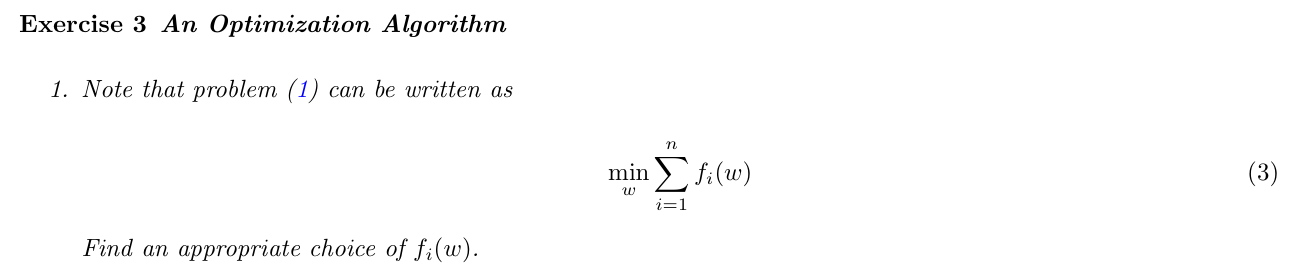

Our objective function is:

$$f(w)=\frac{\lambda}{2}\|w\|_2^2+\frac{1}{n} \sum_{i=1}^n L\left(y_i, w^T x_i\right)$$

We can define objective as sum of a loss function for each data point.

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L\left(y_i, w^T x_i\right)$$

which will imply

$$\min_w f(w)= \min_w \sum_{i=1}^{n}f_i(w)$$

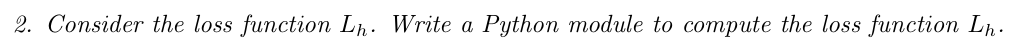

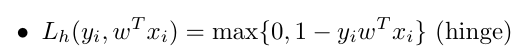

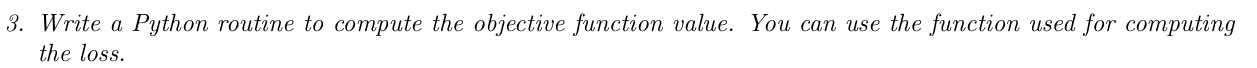

In [ ]:
def hinge_loss(z):
    return np.maximum(0, 1 - z)

#2
def compute_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = hinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss
#3
def compute_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_loss(A[i], y[i], w, lamda, n)
  return cost

In [ ]:
def f(A,y,w,lam):
    #first to get the summation of loss
    sum_loss = 0
    for i in range(n):
        sum_loss = sum_loss + hinge_loss(y[i]*w@A[i])

    f_val = (np.linalg.norm(w))**2 * 0.5 * lam +  (sum_loss/n)

    return f_val

In [ ]:
f(A, y, np.ones(A.shape[1]), 0)

9.760666666666664

In [ ]:
compute_cost(A, y, np.ones(A.shape[1]), 0)

9.760666666666667

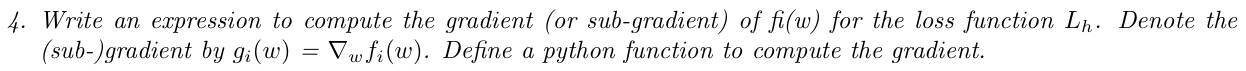

We know that $f_i(w)$ is where $L$ is $L_h$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_h\left(y_i, w^T x_i\right)$$


The subdifferential of the hinge loss with respect to $w$ can be calculated as follows:

When $1-y w^T x<0$, the hinge loss is 0 , so its gradient is 0 .

When $1-y w^T x>0$, the hinge loss is $1-y w^T x$, so the gradient with respect to $w$ is simply $-y x$, because $\frac{∂ \left(1-y w^T x\right)}{∂ w}=-y x$.

Therefore, the subgradient of the hinge loss with respect to $w$ is:
$$
\nabla_w L_h\left(y, w^T x\right)= \begin{cases}-y x & \text { if } 1-y w^T x>0 \\ 0 & \text { if }1-y w^T x<0 \end{cases}
$$

When $1-y w^T x=0$, the hinge loss function is exactly at the hinge point where it changes from being zero to positive. At this point, the function is not differentiable, but we can still consider its subdifferential.

The subdifferential of the hinge loss function at this point includes all possible gradients between the points where the loss is zero and positive. In other words, any value between $-y x$ when $1-$ $y w^T x>0$ and 0 when $1-y w^T x \leq 0$ is included in the subdifferential.

Therefore, at $1-y w^T x=0$, the derivative is not well-defined, but any value between $-y x$ and 0 can be considered as a subgradient. Typically, a common choice is to include $-y x$ as the subgradient at this point.

Therefore for the regularized version, we have:

$$
\nabla_w f_i\left(y, w^T x\right)= \begin{cases}\frac{\lambda w}{n}-\frac{y x}{n} & \text { if } 1-y w^T x \geq 0 \\ \frac{\lambda w}{n} & \text { if }1-y w^T x<0 \end{cases}
$$

This is often used in optimization algorithms such as subgradient descent when dealing with hinge loss.

In [ ]:
def subgradient_hingeloss(x, y, w, lamda, n):
  if (1-y*w@x) >= 0:
    return (lamda*(w/n))-(y*(x/n))
  else: return lamda*w/n

In [ ]:
subgradient_hingeloss(A[1], y[1], np.ones(A.shape[1]), 0, 1)

array([4.9, 3. , 1.4, 0.2])

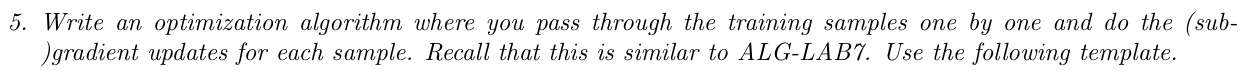

In [ ]:
def OPT1(data,labels,lamda,num_epochs):
  t = 1
  n = data.shape[0]
  d = data.shape[1]

  ## initialization of lists for further questions (DB Store)
  objective_values = [ ]
  test_set_accuracy = []
  train_set_accuracy = []

  #initialize w
  w = np.ones((d,1))
  w = w.flatten()
  arr = np.arange(data.shape[0])
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      w = w-subgradient_hingeloss(data[i], labels[i], w, lamda, n)/t
      t = t+1
      if t>1e4:
        t = 1
    objective_value = compute_cost(data, labels, w, lamda)
    test_accuracy = compute_accuracy(test_data, test_label, w)
    train_accuracy = compute_accuracy(data, labels, w)
    # print("Lamda is: ", lamda)
    # print("Epoch no. : ", epoch)
    # print("Objective values: ", objective_value)
    # print("test accuracy: ", test_accuracy)
    # print("train accuracy: ", train_accuracy)
    # print('--------------------------------------')
    objective_values.append(objective_value)
    test_set_accuracy.append(test_accuracy)
    train_set_accuracy.append(train_accuracy)
  return w, objective_values, test_set_accuracy, train_set_accuracy

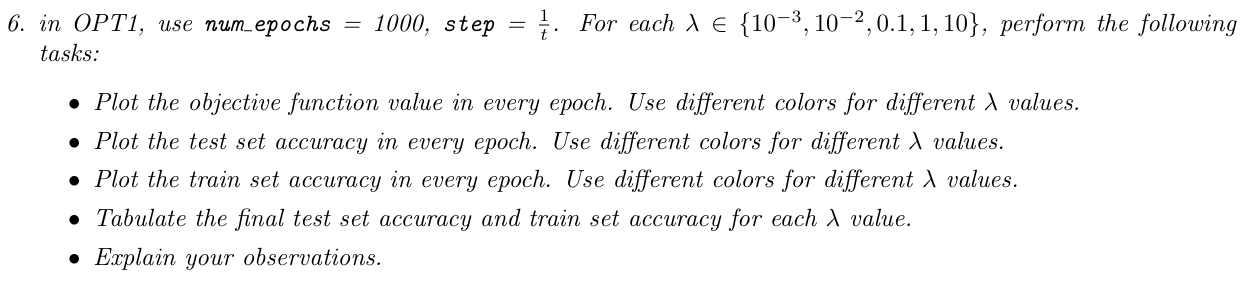

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(1000)]
for lamda in lamdas:
  w, objective_values, test_set_accuracy, train_set_accuracy = OPT1(train_data, train_label, lamda, 1000)
  print(w)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

[-0.43889102  0.20163883  0.06609109  0.65206654]
[-0.40470693  0.1342119   0.22451748  0.71806113]
[-0.40814134  0.15088945  0.07941353  0.60509217]
[-0.2231111  -0.00669494  0.03270954  0.24744565]
[-0.10149157 -0.08388544 -0.01033893 -0.00076294]


Plot of objective value of f with respect to different values

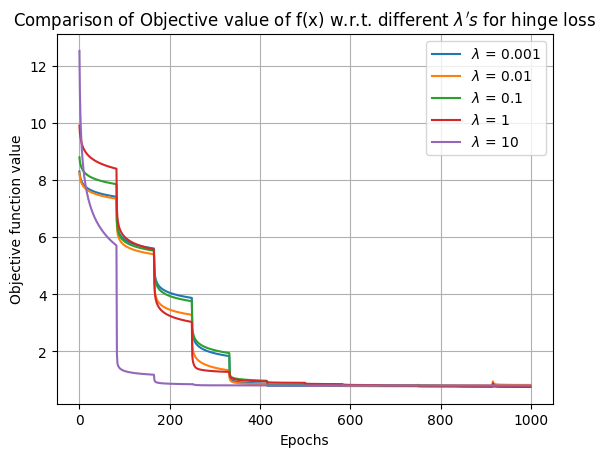

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for hinge loss")
plt.legend()
plt.grid(True)
plt.show()

As we observe that all the objective costs come down significantly as the epoch goes on. $\lambda = 10$ in particular show fast convergence to lowest objective value

plot of test set accuracy in every epoch for different $\lambda 's$

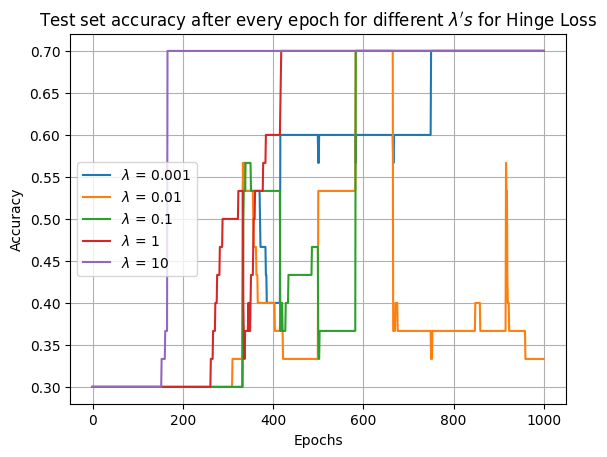

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for Hinge Loss")
plt.legend()
plt.grid(True)
plt.show()

for $\lambda = 10$ the accuracy shoots up pretty fast. After this for $\lambda =1$ is in the second position for converging faster. Higher $\lambda 's$ regularize more and generalization leads to faster convergence and effective accuracy for test.

plot of train set accuracy in every epoch for different $\lambda 's$

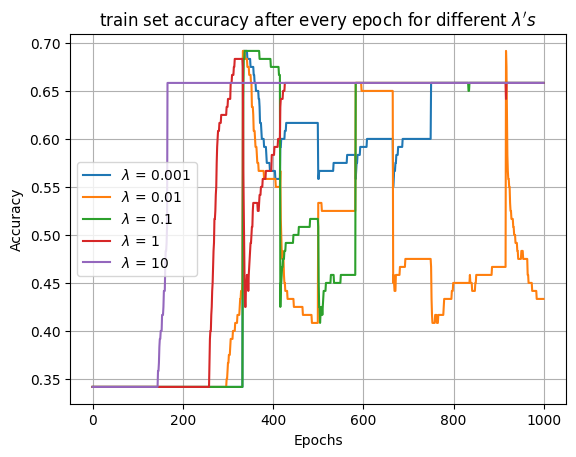

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [ ]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

+----------+----------------------+---------------------+
|   lambda |   Train set accuracy |   Test set accuracy |
+==========+======================+=====================+
|    0.001 |             0.658333 |            0.7      |
+----------+----------------------+---------------------+
|    0.01  |             0.433333 |            0.333333 |
+----------+----------------------+---------------------+
|    0.1   |             0.658333 |            0.7      |
+----------+----------------------+---------------------+
|    1     |             0.658333 |            0.7      |
+----------+----------------------+---------------------+
|   10     |             0.658333 |            0.7      |
+----------+----------------------+---------------------+


Observations:

$\lambda = .01$ performs worst for my training and test data set. Remaining all perform equally well in accuracy. With test accuracy being 0.7 and train being 0.65833 same for all but 0.01. $\lambda = 10$ show fastest convergence.

Effect of Regularization on Objective Function Value: As λ increases, the objective function value might decrease because higher regularization penalizes larger weights, leading to a simpler model.
Conversely, for smaller λ values, the objective function value might increase as the model might overfit the training data. As it has been observed that for $\lambda$ = 10, the objective function value is decreasing rapidly.

Train and Test Set Accuracy:
Initially, train set accuracy may increase as the model learns from the data. However, if the model starts overfitting, the train set accuracy might continue to increase while the test set accuracy might start to decrease.
Higher λ values may result in lower train set accuracy but better generalization, leading to higher test set accuracy. This indicates better performance on unseen data.

Convergence Speed: Higher λ values might lead to faster convergence as the model avoids fitting to noise in the data. Conversely, smaller λ values might lead to slower convergence or even oscillation around the optimal solution, especially if the data is noisy or the model is complex. Sensitivity to Learning Rate (η): The choice of learning rate (η) is crucial. Too small a learning rate might result in slow convergence, while too large a learning rate might cause the optimization process to diverge. for which we have taken η to be 1/t.

Generalization Performance: The goal is to achieve a balance between fitting the training data well and generalizing to unseen data. Regularization helps in achieving this balance by preventing overfitting. Observing how train and test set accuracies evolve over epochs for different λ values can provide insights into the model's generalization performance.







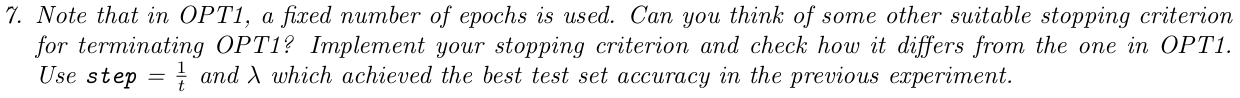

To implement the stopping criterion we observe the test accuracy after each epoch, if the test accuracy doesn't improve for some fixed number of iterations of epoch then we stop the algorithm.

I use step = $\frac{1}{t}$ and $\lambda = 10$

In [ ]:
def OPT1_with_stopping_criterion(data, labels, lamda, num_epochs):
    t = 1
    w = np.ones(data.shape[1])  # initialize weight vector
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-subgradient_hingeloss(data[i], labels[i], w, lamda, n)/t
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [ ]:
best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion(train_data, train_label, 10, 1000)

In [ ]:
lamda = 10

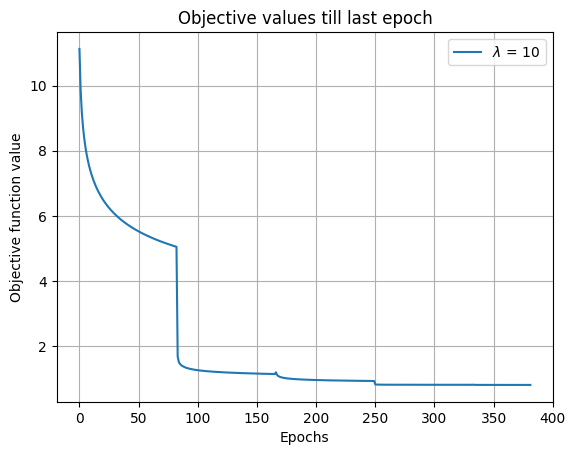

In [ ]:
epochs = [i for i in range(len(objective_values))]
plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

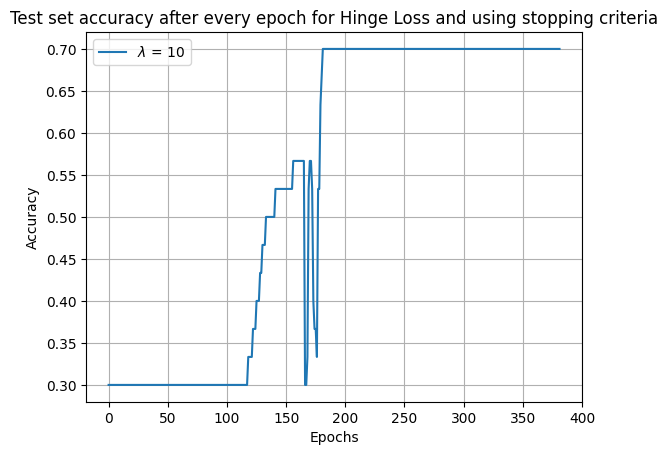

In [ ]:
epochs = [i for i in range(len(test_set_accuracy))]
plt.plot(epochs, test_set_accuracy, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for Hinge Loss and using stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe that after stopping criteria we are able to stop it at 350 epochs. Here the epoch_without_improvement threshold taken is to be 200

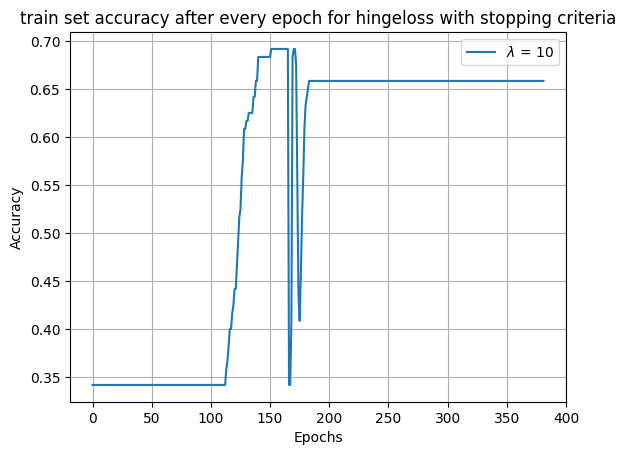

In [ ]:
epochs = [i for i in range(len(train_set_accuracy))]
plt.plot(epochs, train_set_accuracy, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for hingeloss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Comparision of algorithms:

**OPT1 (Fixed Number of Epochs)**:
Algorithm Description: This algorithm runs for a fixed number of epochs and updates the weights for each data point using stochastic gradient descent.
Stopping Criterion: The algorithm stops after a predefined number of epochs, regardless of whether convergence has been achieved.
Pros:
Simple and easy to implement.
Guarantees a fixed number of iterations.
Cons:
May not be optimal for convergence, as it may stop prematurely or continue beyond convergence.
Inefficient if convergence is achieved before the maximum number of epochs.


**OPT1 with Stopping Criteria:**
This algorithm runs until a stopping criterion is met, typically based on the performance on a validation set or the convergence of the objective function.

Stopping Criterion: Stops when there is no improvement in the performance metric (e.g., accuracy) for a certain number of epochs.

Pros:
Allows for early stopping when convergence is achieved, potentially saving computational resources.
More adaptive to the convergence behavior of the optimization process.

Cons:
Requires additional computation to monitor and evaluate the stopping criterion.
The choice of stopping criterion may impact the final result.


**Comparison:**
Convergence: OPT1 with stopping criteria may converge faster as it stops when the model reaches convergence, while OPT1 may continue beyond convergence. OPT1 with stopping criteria may be more efficient as it avoids unnecessary iterations beyond convergence. Performance: OPT1 with stopping criteria may achieve better performance, as it allows for early stopping when the model starts to overfit or the optimization process stalls. OPT1 with stopping criteria may be more robust to hyperparameter choices, as it can adapt to different convergence behaviors.

In summary, while both algorithms have their advantages and disadvantages, OPT1 with stopping criteria generally offers more flexibility and efficiency in achieving convergence and optimizing performance. However, the choice of stopping criterion and its parameters can significantly impact the final results. Therefore, it's essential to experiment with different stopping criteria and hyperparameters to find the optimal solution.

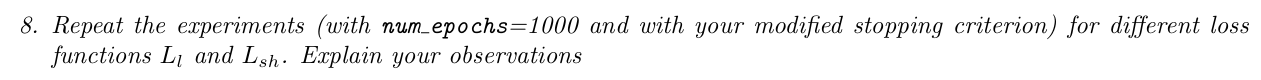

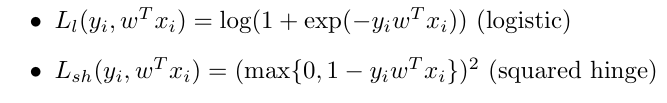

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


In [ ]:
def logistic_loss(z):
    return np.log(1+np.exp(-z))

def compute_logistic_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = logistic_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_logistic_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_logistic_loss(A[i], y[i], w, lamda, n)
  return cost

In [ ]:
def sqhinge_loss(z):
    return (np.maximum(0, 1-z))**2

def compute_sqhinge_loss(x, y, w, lamda, n):
  z = y*w@x
  loss = sqhinge_loss(z)/n
  loss += (lamda*norm(w)**2)/(2*n)
  return loss

def compute_sqhinge_cost(A,y,w,lamda):
  cost = 0
  n = A.shape[0]
  for i in range(n):
    cost += compute_sqhinge_loss(A[i], y[i], w, lamda, n)
  return cost

Now I calculate gradient for each of these fucntions:

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [ ]:
def gradient_sqhinge(x, y, w, lamda, n):
  if 1-y*w@x >= 0:
    grad = -2*(1-y*w@x)*y*x
    grad += lamda*w
    grad /= n
    return grad
  else: return lamda*w/n

def gradient_logistic(x, y, w, lamda, n):
  z = y*w@x
  grad = (-1*y*x)/(1 + np.exp(z))
  grad += lamda*w
  grad /= n
  return grad

In [ ]:
def OPT1_with_stopping_criterion_with_logisticloss(data, labels, lamda, num_epochs):
    t = 1
    w = np.ones(data.shape[1])  # initialize weight vector
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_logistic(data[i], labels[i], w, lamda, n)/t
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_logistic_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


In [ ]:
def OPT1_with_stopping_criterion_with_sqhinge(data, labels, lamda, num_epochs):
    t = 1
    w = np.ones(data.shape[1])  # initialize weight vector
    arr = np.arange(data.shape[0])
    n = data.shape[0]
    d = data.shape[1]

    ## initialization of lists for further questions (DB Store)
    objective_values = [ ]
    test_set_accuracy = []
    train_set_accuracy = []
    best_test_accuracy = 0
    epochs_without_improvement = 0
    best_weights = None

    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # shuffle data every epoch
        for i in np.nditer(arr):
            w = w-gradient_sqhinge(data[i], labels[i], w, lamda, n)/t
            t += 1
            if t > 1e4:
                t = 1
        objective_value = compute_sqhinge_cost(data, labels, w, lamda)
        test_accuracy = compute_accuracy(test_data, test_label, w)
        train_accuracy = compute_accuracy(data, labels, w)

        objective_values.append(objective_value)
        test_set_accuracy.append(test_accuracy)
        train_set_accuracy.append(train_accuracy)

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_weights = w
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # print("Epoch no. : ", epoch)
        # print("Objective values: ", objective_value)
        # print("test accuracy: ", test_accuracy)
        # print("train accuracy: ", train_accuracy)
        # print('--------------------------------------')

        # Stopping criterion: If no improvement for 200 epochs, stop
        if epochs_without_improvement >= 200:
            break

    return best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy


For LOGISTIC LOSS

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(1000)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_logisticloss(train_data, train_label, lamda, 1000)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

KeyboardInterrupt: 

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe that for $\lambda = 10$ once again the algorithm moves towards better objective value. With stopping criteria in place the algorithm converges for some lambda values while some do not.

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

$\lambda = 10$ performs better compared to other $\lambda 's$ when stopping criteria is concerned. for other lambdas the stopping criteria proved to be detremental as test accuracy was stuck at 0.3, which shows how important the stopping criteria hyperparameter can be.

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for logistic loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [ ]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

Observations:

As we observe that for $\lambda = 10$ once again the algorithm moves towards better objective value. With stopping criteria in place the algorithm converges for some lambda values while some do not.

$\lambda = 10$ performs better compared to other $\lambda 's$ when stopping criteria is concerned. for other lambdas the stopping criteria proved to be detremental as test accuracy was stuck at 0.3, which shows how important the stopping criteria hyperparameter can be. It also depends on the initialization of weights.

The logistic loss function typically exhibits smoother optimization behavior compared to the hinge loss function. As a result, both OPT1 and OPT1 with stopping criteria may converge faster when optimizing the logistic loss function. OPT1 with stopping criteria may show even faster convergence due to its ability to adaptively terminate the optimization process when convergence is achieved. But in this case it proved to be detremental. The smoother nature of the logistic loss function allows for more stable optimization behavior which can be seen by the smoothness of the curve, potentially leading to more efficient convergence.

The logistic loss function is well-suited for probabilistic classification tasks, as it provides probabilistic interpretations of the model predictions.
OPT1 with stopping criteria may lead to better performance in terms of accuracy when optimizing the logistic loss function. The smoother optimization behavior of the logistic loss function makes it more robust to hyperparameter choices such as the learning rate and regularization strength.
OPT1 with stopping criteria is robust to hyperparameter choices due to its adaptability to different convergence behaviors. This adaptability allows it to effectively optimize the logistic loss function across a wide range of hyperparameters.







SQUARED HINGE

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]    #[1e-3, 1e-2, 0.1, 1, 10]
objective_values_lamda_store = []
test_set_accuracy_store = []
train_set_accuracy_store = []
final_test_set_accuracy_store = []
epochs = [i for i in range(1000)]
for lamda in lamdas:
  best_weights, best_test_accuracy, objective_values, test_set_accuracy, train_set_accuracy = OPT1_with_stopping_criterion_with_sqhinge(train_data, train_label, lamda, 1000)
  # plt.plot(epochs, objective_values, label = f'$\lambda$ = {lamda}')
  objective_values_lamda_store.append(objective_values)
  test_set_accuracy_store.append(test_set_accuracy)
  train_set_accuracy_store.append(train_set_accuracy)
# plt.legend()
# plt.show()

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(objective_values_lamda_store[i]))]
  plt.plot(epochs, objective_values_lamda_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for sqaured hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

As we observe once again, for lambda = 10 achieves lowest objective value and converges much faster than other counterpart. It also benifits from early stopping criteria.

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]
epochs = [i for i in range(1000)]
i=0
for lamda in lamdas:
  epochs = [i for i in range(len(test_set_accuracy_store[i]))]
  plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Test set accuracy is highest for the $\lambda = 10$ and it reaches that position faster than others. for some $\lambda 's$ the accuracy even drops a bit.

In [ ]:
lamdas = [1e-3, 1e-2, 0.1, 1, 10]

i=0
for lamda in lamdas:
  epochs = [i for i in range(len(train_set_accuracy_store[i]))]
  plt.plot(epochs, train_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
  i+=1

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("train set accuracy after every epoch for different $\lambda's$ for squared hinge loss with stopping criteria")
plt.legend()
plt.grid(True)
plt.show()

Training accuracy increases for lambda = 10 and for some others it drops and never improves because of early stopping criteria which is based on test accuracy and not on training accuracy.

In [ ]:
list_of_final_train_set_accuracy = [x[-1] for x in train_set_accuracy_store]
list_of_final_test_set_accuracy = [x[-1] for x in test_set_accuracy_store]

In [ ]:
from tabulate import tabulate
head = [f"lambda", "Train set accuracy","Test set accuracy"]
table=[[lamdas[i], list_of_final_train_set_accuracy[i], list_of_final_test_set_accuracy[i]] for i in range(len(lamdas)) ]
print(tabulate(table, headers=head, tablefmt="grid"))

Observations:

As we observe that for $\lambda = 10$ once again the algorithm moves towards better objective value. With stopping criteria in place the algorithm converges for some lambda values while some do not.

$\lambda = 10$ performs better compared to other $\lambda 's$ when stopping criteria is concerned. for other lambdas the stopping criteria proved to be detremental as test accuracy was lowest to 0.4, which shows how important the stopping criteria hyperparameter can be. It also depends on the initialization of weights.

The squared hinge loss function is convex and piecewise quadratic, which means it generally converges efficiently. Both OPT1 and OPT1 with stopping criteria may converge relatively quickly when optimizing the squared hinge loss function. However, OPT1 with stopping criteria may show slightly faster convergence due to its adaptive termination mechanism.

The squared hinge loss function has a smoother derivative compared to the hinge loss function, which can lead to more stable optimization behavior.

The squared hinge loss function penalizes misclassifications quadratically, which can lead to more robust optimization behavior compared to the hinge loss function.
OPT1 with stopping criteria may lead to better performance in terms of accuracy when optimizing the squared hinge loss function. But here it proved detremental to some $\lambda$ values where we did not achieve our desired results. This is because it can adaptively terminate the optimization process when necessary, preventing overfitting and promoting better generalization.










